# Data Aggregation and Grouping in Pandas

Data aggregation and grouping are fundamental techniques in data analysis that allow us to summarize and extract insights from large datasets. These operations transform raw data into meaningful information by organizing data into groups and calculating summary statistics.

In this notebook, we'll explore how to:
- Use groupby operations in pandas
- Apply aggregation functions
- Work with multiple grouping variables
- Perform complex aggregations
- Transform and filter grouped data

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

# For better display of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## 2. Creating Sample Data

Let's create a realistic dataset to work with throughout this notebook. We'll simulate a sales dataset with different products, regions, dates, and sales figures.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create date range for the past year
dates = pd.date_range(start='2024-01-01', end='2024-04-01', freq='D')

# Define categories
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch']
regions = ['North', 'South', 'East', 'West', 'Central']
payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Cash']

# Generate random data
n_records = 1000
data = {
    'date': np.random.choice(dates, n_records),
    'product': np.random.choice(products, n_records),
    'region': np.random.choice(regions, n_records),
    'units_sold': np.random.randint(1, 20, n_records),
    'unit_price': np.random.uniform(100, 2000, n_records).round(2),
    'customer_age': np.random.randint(18, 70, n_records),
    'payment_method': np.random.choice(payment_methods, n_records),
    'discount_applied': np.random.choice([True, False], n_records, p=[0.3, 0.7])
}

# Create DataFrame
sales_df = pd.DataFrame(data)

# Calculate total sale amount
sales_df['sales_amount'] = sales_df['units_sold'] * sales_df['unit_price']
# Apply discount where applicable
sales_df.loc[sales_df['discount_applied'], 'sales_amount'] *= 0.9

# Display the first few rows
sales_df.head()

,date,product,region,units_sold,unit_price,customer_age,payment_method,discount_applied,sales_amount
0,2024-02-21,Laptop,South,8,1594.86,68,Credit Card,False,12758.880
1,2024-01-15,Laptop,South,11,855.15,31,Debit Card,False,9406.650
2,2024-03-12,Tablet,West,1,1075.86,56,Credit Card,False,1075.860
3,2024-03-01,Tablet,Central,7,581.38,48,PayPal,False,4069.660
4,2024-01-21,Laptop,Central,17,1976.55,31,Debit Card,True,30241.215


Let's check our data structure and basic information:

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1000 non-null   datetime64[ns]
 1   product           1000 non-null   object        
 2   region            1000 non-null   object        
 3   units_sold        1000 non-null   int32         
 4   unit_price        1000 non-null   float64       
 5   customer_age      1000 non-null   int32         
 6   payment_method    1000 non-null   object        
 7   discount_applied  1000 non-null   bool          
 8   sales_amount      1000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 55.8+ KB


In [4]:
sales_df.describe()

,date,units_sold,unit_price,customer_age,sales_amount
count,1000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2024-02-14 10:23:31.200000,10.091000,1057.76075,44.015000,10320.874887
min,2024-01-01 00:00:00,1.000000,102.56000,18.000000,160.380000
25%,2024-01-22 00:00:00,5.000000,592.29000,32.000000,3483.281250
50%,2024-02-15 00:00:00,10.000000,1073.35500,44.000000,8108.990500
75%,2024-03-07 00:00:00,15.000000,1533.51500,57.000000,14796.743250
max,2024-04-01 00:00:00,19.000000,1995.48000,69.000000,37134.740000
std,NaN,5.548649,542.16699,14.863098,8249.025690


## 3. Basic Grouping and Aggregation

The `groupby()` function in pandas is the foundation for aggregation operations. It splits the data into groups based on specified columns and allows for computations on these groups.

### 3.1 Simple Grouping with a Single Column

In [5]:
# Group by region and calculate the sum of sales
region_sales = sales_df.groupby('region')['sales_amount'].sum().reset_index()
region_sales.sort_values('sales_amount', ascending=False)

,region,sales_amount
4,West,2393751.876
0,Central,2115051.690
2,North,2055488.735
1,East,1886910.547
3,South,1869672.039


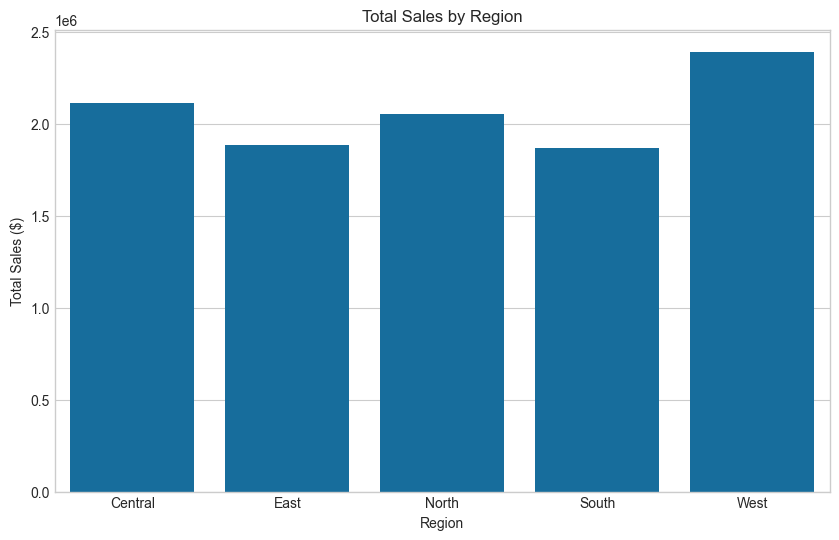

In [6]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sales_amount', data=region_sales)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

### 3.2 Using Different Aggregation Functions

Pandas provides many built-in aggregation functions like `sum()`, `mean()`, `count()`, `min()`, `max()`, etc.

In [7]:
# Group by product and calculate multiple statistics
product_stats = sales_df.groupby('product').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'units_sold': ['sum', 'mean', 'max']
}).round(2)

product_stats

sales_amount                 units_sold           
                    sum      mean count        sum   mean max
product                                                      
Headphones   1973793.54  10669.15   185       1918  10.37  19
Laptop       2144828.66  10213.47   210       2078   9.90  19
Smartphone   2002352.57   9912.64   202       1966   9.73  19
Smartwatch   2135819.89  10418.63   205       2080  10.15  19
Tablet       2064080.22  10424.65   198       2049  10.35  19

We can flatten the multi-level column index for easier viewing:

In [8]:
# Flatten the multi-level column index
product_stats.columns = ['_'.join(col).strip() for col in product_stats.columns.values]
product_stats.reset_index()

,product,sales_amount_sum,sales_amount_mean,sales_amount_count,units_sold_sum,units_sold_mean,units_sold_max
0,Headphones,1973793.54,10669.15,185,1918,10.37,19
1,Laptop,2144828.66,10213.47,210,2078,9.90,19
2,Smartphone,2002352.57,9912.64,202,1966,9.73,19
3,Smartwatch,2135819.89,10418.63,205,2080,10.15,19
4,Tablet,2064080.22,10424.65,198,2049,10.35,19


### 3.3 Using Custom Aggregation Functions

We can also use custom functions with `agg()`:

In [9]:
# Define a custom function to calculate the range
def sales_range(x):
    return x.max() - x.min()

# Calculate the median, range, and percentiles
product_custom_agg = sales_df.groupby('product')['sales_amount'].agg([
    ('median', 'median'),
    ('range', sales_range),
    ('percentile_25', lambda x: np.percentile(x, 25)),
    ('percentile_75', lambda x: np.percentile(x, 75))
]).round(2)

product_custom_agg

,median,range,percentile_25,percentile_75
product,,,,
Headphones,8210.16,32779.35,3345.41,16006.17
Laptop,8289.19,36889.43,3603.10,14767.84
Smartphone,6947.03,34040.65,2852.30,15258.62
Smartwatch,8819.02,35684.46,3900.10,14216.90
Tablet,8640.62,35072.24,4290.79,14657.58


## 4. Grouping with Multiple Columns

Often, we need to group data by more than one column to get more detailed insights.

In [10]:
# Group by both region and product
region_product_sales = sales_df.groupby(['region', 'product'])['sales_amount'].sum().reset_index()
region_product_sales.head(10)

,region,product,sales_amount
0,Central,Headphones,312549.555
1,Central,Laptop,571027.770
2,Central,Smartphone,281993.908
3,Central,Smartwatch,466713.870
4,Central,Tablet,482766.587
5,East,Headphones,464936.922
6,East,Laptop,304541.324
7,East,Smartphone,462060.555
8,East,Smartwatch,405493.964
9,East,Tablet,249877.782


In [11]:
# Create a pivot table for better visualization
sales_pivot = region_product_sales.pivot_table(index='region', columns='product', values='sales_amount')
sales_pivot

product,Headphones,Laptop,Smartphone,Smartwatch,Tablet
region,,,,,
Central,312549.555,571027.770,281993.908,466713.870,482766.587
East,464936.922,304541.324,462060.555,405493.964,249877.782
North,429711.491,389099.266,372124.285,482078.747,382474.946
South,246611.651,452844.771,342086.238,397559.239,430570.140
West,519983.925,427315.532,544087.582,383974.073,518390.764


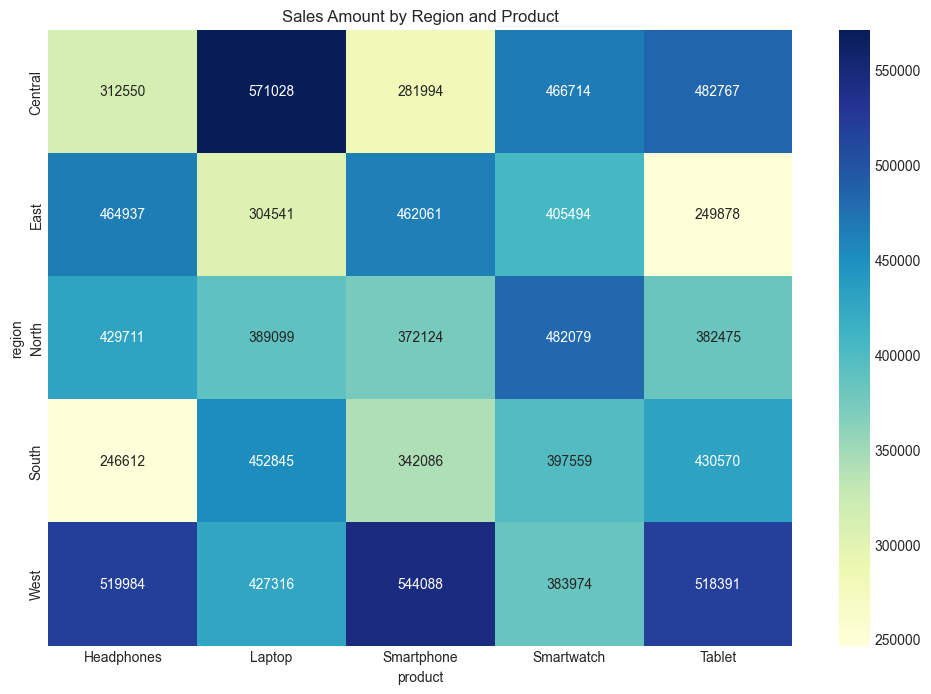

In [12]:
# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Amount by Region and Product')
plt.show()

### 4.1 Unstacking Grouped Results

When grouping by multiple columns, we can use `unstack()` to convert one level of index to columns:

In [13]:
# Group by region and payment method, then unstack
payment_by_region = sales_df.groupby(['region', 'payment_method'])['sales_amount'].sum().unstack()
payment_by_region

payment_method,Cash,Credit Card,Debit Card,PayPal
region,,,,
Central,535927.954,568332.511,565335.287,445455.938
East,494570.808,424785.294,491217.465,476336.980
North,447238.012,529595.606,566067.437,512587.680
South,399683.210,439948.592,643539.106,386501.131
West,616283.239,429977.118,674942.619,672548.900


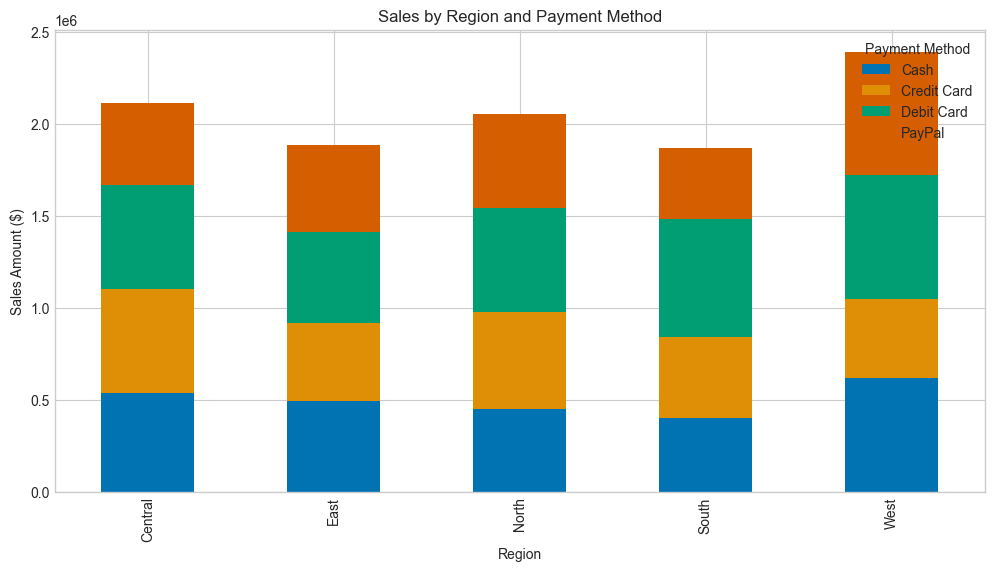

In [14]:
# Visualize as a stacked bar chart
payment_by_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Region and Payment Method')
plt.ylabel('Sales Amount ($)')
plt.xlabel('Region')
plt.legend(title='Payment Method')
plt.show()

## 5. The Split-Apply-Combine Pattern

GroupBy operations follow the split-apply-combine pattern:
1. **Split**: Data is split into groups based on key(s)
2. **Apply**: A function is applied to each group independently
3. **Combine**: The results are combined into a new data structure

Let's see a more complex example:

In [15]:
# Extract month from date
sales_df['month'] = sales_df['date'].dt.month_name()

# Group by month and calculate multiple aggregations for different columns
monthly_stats = sales_df.groupby('month').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'units_sold': 'sum',
    'customer_age': ['mean', 'median', 'min', 'max'],
    'discount_applied': 'sum'  # Counts True values (discounted sales)
})

# Flatten the columns
monthly_stats.columns = ['_'.join(col).strip() for col in monthly_stats.columns.values]

# Calculate additional metrics
monthly_stats['pct_discounted'] = (monthly_stats['discount_applied_sum'] / monthly_stats['sales_amount_count'] * 100).round(1)
monthly_stats['avg_sale_per_unit'] = (monthly_stats['sales_amount_sum'] / monthly_stats['units_sold_sum']).round(2)

# Sort by month order (not alphabetical)
month_order = ['January', 'February', 'March', 'April']
monthly_stats = monthly_stats.reindex(month_order)

monthly_stats

,sales_amount_sum,sales_amount_mean,sales_amount_count,units_sold_sum,customer_age_mean,customer_age_median,customer_age_min,customer_age_max,discount_applied_sum,pct_discounted,avg_sale_per_unit
month,,,,,,,,,,,
January,3771857.189,10776.734826,350,3552,43.291429,42.0,18,69,117,33.4,1061.90
February,3162646.170,10072.121561,314,3107,45.213376,46.0,18,69,109,34.7,1017.91
March,3166851.829,10021.683003,316,3254,43.629747,42.0,18,69,109,34.5,973.22
April,219519.699,10975.984950,20,178,43.950000,44.0,21,67,5,25.0,1233.26


## 6. Advanced Groupby Operations

### 6.1 Filtering Groups

In [16]:
# Filter groups based on a condition
# Find products where the average sales amount is greater than 10000
high_value_products = sales_df.groupby('product').filter(lambda x: x['sales_amount'].mean() > 10000)

# Count records by product in the filtered dataset
high_value_products['product'].value_counts()

product
Laptop        210
Smartwatch    205
Tablet        198
Headphones    185
Name: count, dtype: int64

### 6.2 Transforming Groups

The `transform()` method applies a function to each group and returns a result with the same shape as the input.

In [17]:
# Add a column with the mean sales amount for each product
sales_df['product_avg_sales'] = sales_df.groupby('product')['sales_amount'].transform('mean')

# Calculate how each sale compares to its product average
sales_df['sales_vs_avg'] = sales_df['sales_amount'] - sales_df['product_avg_sales']
sales_df['sales_vs_avg_pct'] = (sales_df['sales_vs_avg'] / sales_df['product_avg_sales'] * 100).round(1)

# Show a sample of the results
sales_df[['product', 'sales_amount', 'product_avg_sales', 'sales_vs_avg', 'sales_vs_avg_pct']].sample(5)

,product,sales_amount,product_avg_sales,sales_vs_avg,sales_vs_avg_pct
260,Laptop,22932.099,10213.469824,12718.629176,124.5
4,Laptop,30241.215,10213.469824,20027.745176,196.1
988,Laptop,4295.862,10213.469824,-5917.607824,-57.9
273,Tablet,332.610,10424.647571,-10092.037571,-96.8
142,Smartphone,22891.960,9912.636475,12979.323525,130.9


### 6.3 Applying Functions to Groups

The `apply()` method applies a function to each group and returns a result for each group.

In [18]:
# Find the top 2 sales in each region
def get_top_n(group, n=2):
    return group.nlargest(n, 'sales_amount')

top_sales_by_region = sales_df.groupby('region').apply(get_top_n)
top_sales_by_region[['region', 'product', 'sales_amount', 'date']]

C:\Users\pavel\AppData\Local\Temp\ipykernel_18360\3131881.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_by_region = sales_df.groupby('region').apply(get_top_n)


region     product  sales_amount       date
region                                                   
Central 609  Central      Laptop     30600.342 2024-02-07
        4    Central      Laptop     30241.215 2024-01-21
East    881     East      Laptop     37134.740 2024-03-27
        374     East  Smartphone     33974.460 2024-02-11
North   824    North      Tablet     35361.660 2024-03-20
        615    North  Smartphone     29353.050 2024-03-11
South   947    South  Smartwatch     35944.580 2024-01-06
        686    South  Smartphone     34241.420 2024-01-28
West    631     West  Smartphone     34286.580 2024-03-07
        725     West  Smartphone     32067.950 2024-01-11

In [19]:
# # Option 1: Use the include_groups parameter
# def get_top_n(group, n=2):
#     return group.nlargest(n, 'sales_amount')

# top_sales_by_region = sales_df.groupby('region').apply(get_top_n, include_groups=False)
# top_sales_by_region[['region', 'product', 'sales_amount', 'date']]

```
KeyError: "['region'] not in index"
```

In [20]:
# Option 1: Use the include_groups=False parameter 
def get_top_n(group, n=2):
    return group.nlargest(n, 'sales_amount')

# When using include_groups=False, region is no longer included in each group
top_sales_by_region = sales_df.groupby('region').apply(get_top_n, include_groups=False)

# The region information is now in the index, so reset_index() to make it a column
top_sales_by_region = top_sales_by_region.reset_index(level=0)  # This brings 'region' from index to columns

# Now you can access the columns
top_sales_by_region[['region', 'product', 'sales_amount', 'date']]

,region,product,sales_amount,date
609,Central,Laptop,30600.342,2024-02-07
4,Central,Laptop,30241.215,2024-01-21
881,East,Laptop,37134.740,2024-03-27
374,East,Smartphone,33974.460,2024-02-11
824,North,Tablet,35361.660,2024-03-20
615,North,Smartphone,29353.050,2024-03-11
947,South,Smartwatch,35944.580,2024-01-06
686,South,Smartphone,34241.420,2024-01-28
631,West,Smartphone,34286.580,2024-03-07
725,West,Smartphone,32067.950,2024-01-11


In [21]:
# Option 2: Explicitly select the columns to operate on
def get_top_n(group, n=2):
    return group.nlargest(n, 'sales_amount')

top_sales_by_region = sales_df.groupby('region')[['product', 'sales_amount', 'date', 'region']].apply(get_top_n)
top_sales_by_region[['region', 'product', 'sales_amount', 'date']]

region     product  sales_amount       date
region                                                   
Central 609  Central      Laptop     30600.342 2024-02-07
        4    Central      Laptop     30241.215 2024-01-21
East    881     East      Laptop     37134.740 2024-03-27
        374     East  Smartphone     33974.460 2024-02-11
North   824    North      Tablet     35361.660 2024-03-20
        615    North  Smartphone     29353.050 2024-03-11
South   947    South  Smartwatch     35944.580 2024-01-06
        686    South  Smartphone     34241.420 2024-01-28
West    631     West  Smartphone     34286.580 2024-03-07
        725     West  Smartphone     32067.950 2024-01-11

## 7. Aggregation with Pivot Tables

Pivot tables provide a convenient way to summarize data with a more flexible layout.

In [22]:
# Create a pivot table: products by month with sales amounts
pivot = pd.pivot_table(
    sales_df, 
    values='sales_amount', 
    index='product',
    columns='month', 
    aggfunc='sum'
)

# Reorder columns by month
pivot = pivot[month_order]

# Add row totals
pivot['Total'] = pivot.sum(axis=1)

# Add column percentages
for month in month_order:
    pivot[f'{month} %'] = (pivot[month] / pivot['Total'] * 100).round(1)

pivot

month,January,February,March,April,Total,January %,February %,March %,April %
product,,,,,,,,,
Headphones,510618.801,641653.116,769713.418,51808.209,1973793.544,25.9,32.5,39.0,2.6
Laptop,826767.646,722647.145,564016.372,31397.500,2144828.663,38.5,33.7,26.3,1.5
Smartphone,741955.428,530039.644,642758.476,87599.020,2002352.568,37.1,26.5,32.1,4.4
Smartwatch,909933.870,693746.870,512662.858,19476.295,2135819.893,42.6,32.5,24.0,0.9
Tablet,782581.444,574559.395,677700.705,29238.675,2064080.219,37.9,27.8,32.8,1.4


### 7.1 Multi-level Pivot Tables

In [23]:
# Create a multi-level pivot table
multi_pivot = pd.pivot_table(
    sales_df,
    values=['sales_amount', 'units_sold'],
    index=['region', 'product'],
    columns='month',
    aggfunc={'sales_amount': 'sum', 'units_sold': 'sum'},
    fill_value=0
)

# Show a portion of the table
multi_pivot.loc[('North',), :].head()

sales_amount                                     units_sold                       
month             April    February     January       March      April February January March
product                                                                                      
Headphones     5855.625  103193.887  128144.295  192517.684          5      130     145   220
Laptop         2278.260  109270.345  169151.361  108399.300          3      105     153   104
Smartphone        0.000   78054.858  159931.562  134137.865          0      105     140   103
Smartwatch     3486.375  145587.541  174076.000  158928.831          5      132     172   174
Tablet            0.000   47045.408  150386.812  185042.726          0       47     144   162

## 8. Time-Based Grouping and Resampling

For time series data, we can use the `resample()` method to group by date/time intervals.

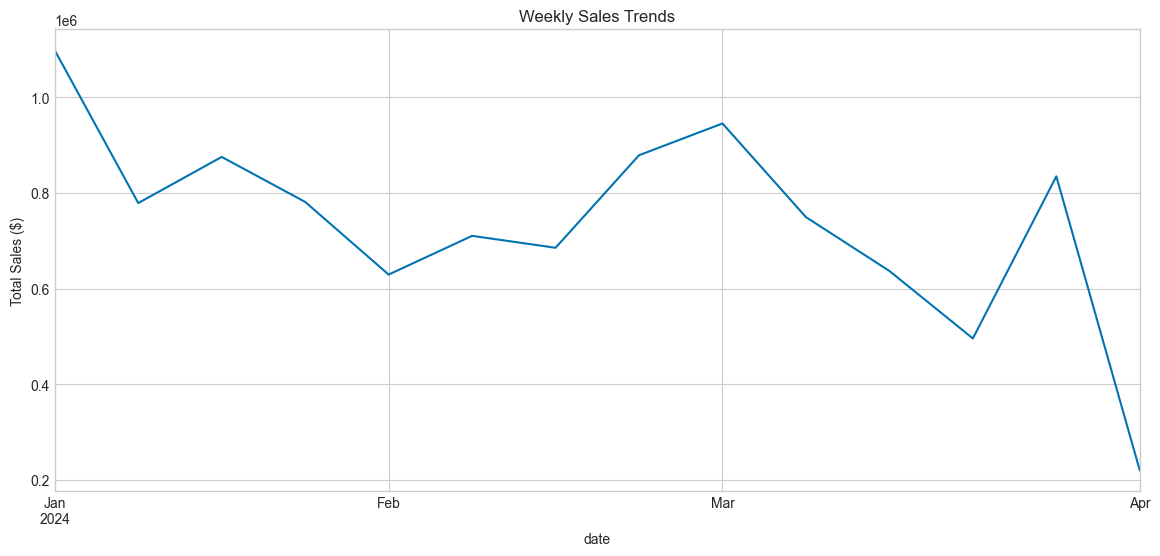

In [24]:
# Set the date as index
time_series = sales_df.set_index('date')

# Resample by week and calculate sum of sales
weekly_sales = time_series.resample('W')['sales_amount'].sum()

# Plot the time series
plt.figure(figsize=(14, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trends')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

## 9. Practical Example: Sales Dashboard

Let's combine several aggregation techniques to create a sales analysis dashboard.

In [25]:
# 1. Calculate overall sales metrics
total_sales = sales_df['sales_amount'].sum()
total_units = sales_df['units_sold'].sum()
avg_sale = sales_df['sales_amount'].mean()
num_transactions = len(sales_df)

# 2. Product performance
product_perf = sales_df.groupby('product').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'units_sold': 'sum'
}).round(2)
product_perf.columns = ['_'.join(col).strip() for col in product_perf.columns.values]
product_perf['avg_price'] = (product_perf['sales_amount_sum'] / product_perf['units_sold_sum']).round(2)
product_perf['sales_pct'] = (product_perf['sales_amount_sum'] / total_sales * 100).round(1)
product_perf = product_perf.sort_values('sales_amount_sum', ascending=False)

# 3. Regional performance
region_perf = sales_df.groupby('region').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'units_sold': 'sum',
    'discount_applied': 'sum'
}).round(2)
region_perf.columns = ['_'.join(col).strip() for col in region_perf.columns.values]
region_perf['discount_rate'] = (region_perf['discount_applied_sum'] / region_perf['sales_amount_count'] * 100).round(1)
region_perf = region_perf.sort_values('sales_amount_sum', ascending=False)

# 4. Time analysis
time_series = sales_df.set_index('date')
daily_sales = time_series.resample('D')['sales_amount'].sum()

# 5. Payment method analysis
payment_analysis = sales_df.groupby('payment_method').agg({
    'sales_amount': ['sum', 'mean', 'count'],
    'customer_age': 'mean'
}).round(2)
payment_analysis.columns = ['_'.join(col).strip() for col in payment_analysis.columns.values]
payment_analysis['pct_of_transactions'] = (payment_analysis['sales_amount_count'] / num_transactions * 100).round(1)
payment_analysis = payment_analysis.sort_values('sales_amount_sum', ascending=False)

### Sales Dashboard: Key Metrics

In [26]:
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Number of Transactions: {num_transactions:,}")
print(f"Average Sale Amount: ${avg_sale:,.2f}")
print(f"Total Units Sold: {total_units:,}")

Total Sales: $10,320,874.89
Number of Transactions: 1,000
Average Sale Amount: $10,320.87
Total Units Sold: 10,091


### Sales Dashboard: Product Performance

In [27]:
product_perf

,sales_amount_sum,sales_amount_mean,sales_amount_count,units_sold_sum,avg_price,sales_pct
product,,,,,,
Laptop,2144828.66,10213.47,210,2078,1032.16,20.8
Smartwatch,2135819.89,10418.63,205,2080,1026.84,20.7
Tablet,2064080.22,10424.65,198,2049,1007.36,20.0
Smartphone,2002352.57,9912.64,202,1966,1018.49,19.4
Headphones,1973793.54,10669.15,185,1918,1029.09,19.1


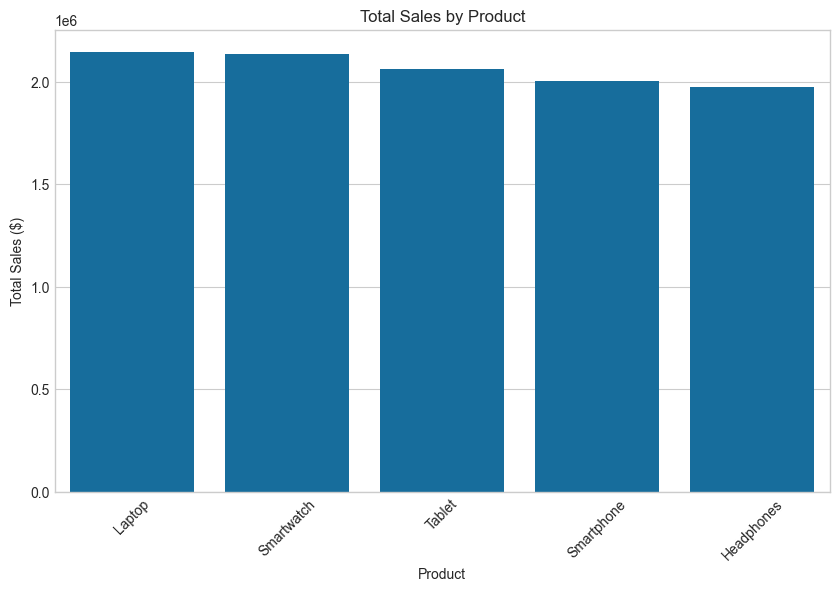

In [28]:
# Visualize product performance
plt.figure(figsize=(10, 6))
sns.barplot(x=product_perf.index, y='sales_amount_sum', data=product_perf)
plt.title('Total Sales by Product')
plt.ylabel('Total Sales ($)')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()

### Sales Dashboard: Regional Performance

In [29]:
region_perf

,sales_amount_sum,sales_amount_mean,sales_amount_count,units_sold_sum,discount_applied_sum,discount_rate
region,,,,,,
West,2393751.88,10362.56,231,2333,81,35.1
Central,2115051.69,10367.90,204,2054,74,36.3
North,2055488.74,10650.20,193,2049,65,33.7
East,1886910.55,10367.64,182,1793,57,31.3
South,1869672.04,9840.38,190,1862,63,33.2


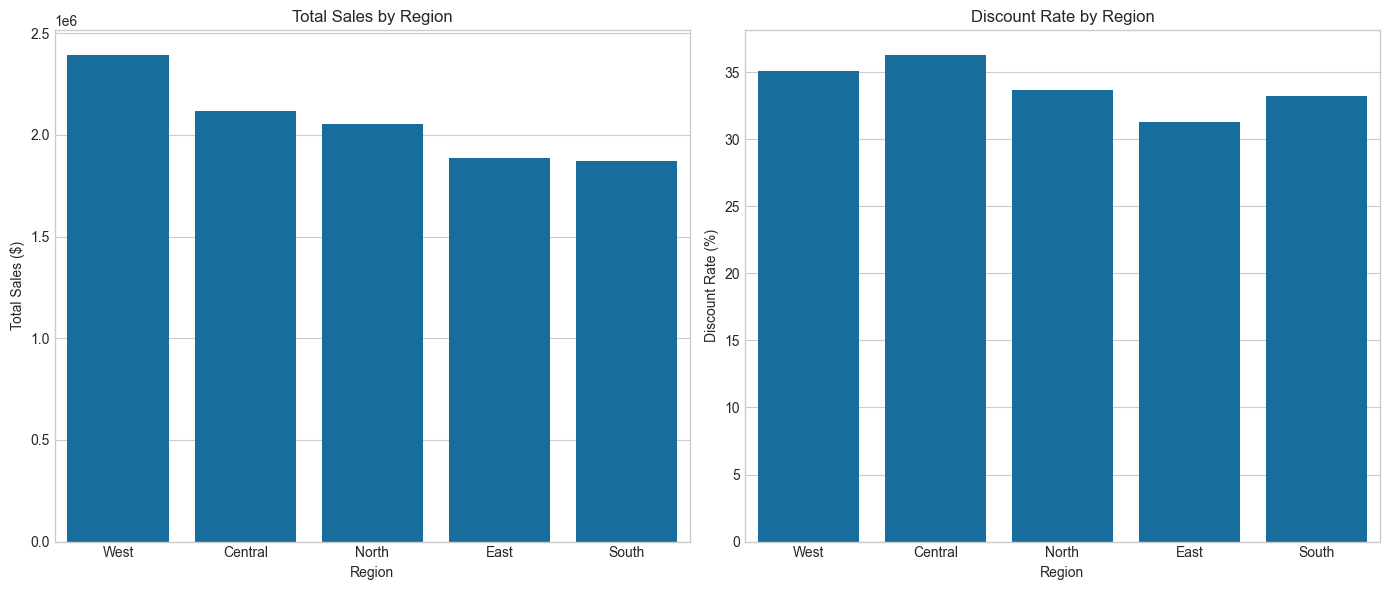

In [30]:
# Visualize regional performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=region_perf.index, y='sales_amount_sum', data=region_perf, ax=ax1)
ax1.set_title('Total Sales by Region')
ax1.set_ylabel('Total Sales ($)')
ax1.set_xlabel('Region')

sns.barplot(x=region_perf.index, y='discount_rate', data=region_perf, ax=ax2)
ax2.set_title('Discount Rate by Region')
ax2.set_ylabel('Discount Rate (%)')
ax2.set_xlabel('Region')

plt.tight_layout()
plt.show()

### Sales Dashboard: Payment Method Analysis

In [31]:
payment_analysis

,sales_amount_sum,sales_amount_mean,sales_amount_count,customer_age_mean,pct_of_transactions
payment_method,,,,,
Debit Card,2941101.91,10466.55,281,44.17,28.1
Cash,2493703.22,9974.81,250,42.01,25.0
PayPal,2493430.63,10936.10,228,45.58,22.8
Credit Card,2392639.12,9927.96,241,44.44,24.1


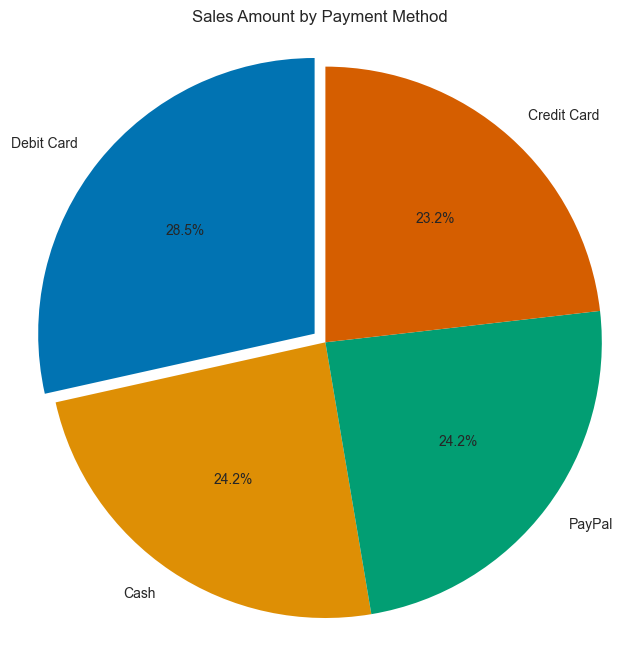

In [32]:
# Plot payment methods
plt.figure(figsize=(8, 8))
plt.pie(
    payment_analysis['sales_amount_sum'], 
    labels=payment_analysis.index, 
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0, 0, 0]  # Explode the first slice
)
plt.title('Sales Amount by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Sales Dashboard: Time Trends

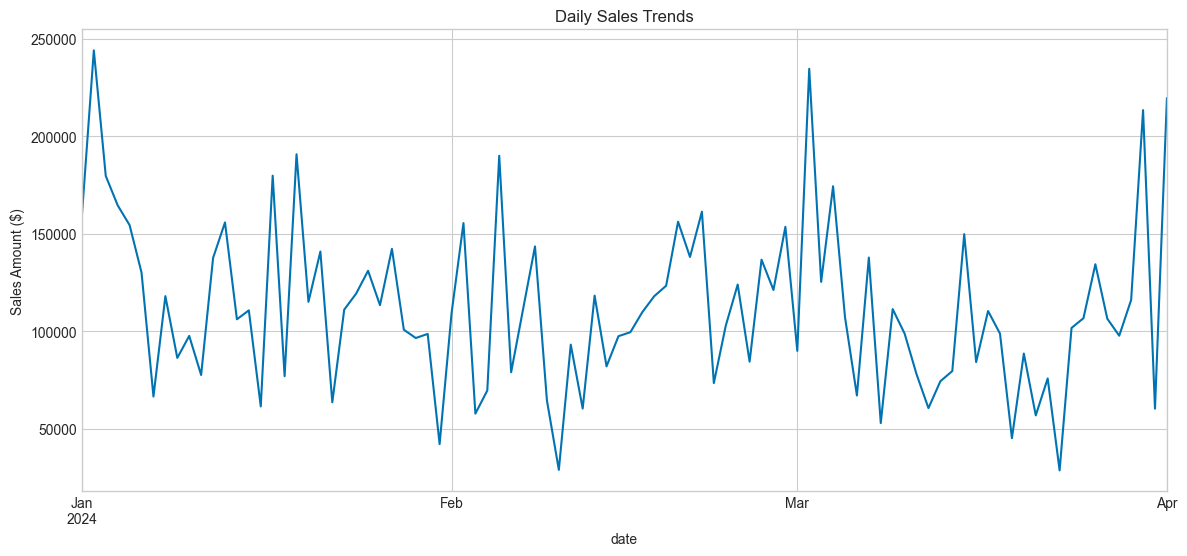

In [33]:
# Plot time trends
plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Sales Trends')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.show()

## 10. Conclusion and Best Practices

### Key Takeaways:

1. **The Split-Apply-Combine Pattern**: GroupBy operations follow this pattern, splitting data into groups, applying functions, then combining results.

2. **Multiple Aggregations**: Use `agg()` to apply multiple aggregation functions to different columns.

3. **Transformation vs. Aggregation**: 
   - `transform()` returns data with the same shape as the input
   - `agg()` returns one row per group
   - `apply()` provides the most flexibility for custom operations

4. **Pivot Tables**: Provide a convenient way to reshape data for analysis.

5. **Time-Based Grouping**: Use `resample()` for time series data.

### Best Practices:

1. **Chain Operations Carefully**: GroupBy operations can be chained, but be mindful of performance.

2. **Flatten Multi-Index Columns**: After complex aggregations, flatten multi-index columns for easier handling.

3. **Use Descriptive Column Names**: When creating new columns from aggregations, use clear names.

4. **Consider Performance**: For very large datasets, consider more efficient approaches like:
   - Using the `numba` library for custom aggregations
   - Using dask or PySpark for distributed computing

5. **Visualize Results**: Always visualize aggregated data to better understand patterns and insights.

## Additional Exercises

1. Calculate the average age of customers for each product and region combination.

2. Identify which day of the week has the highest average sales.

3. Find the top 3 products in each region based on units sold.

4. Create a rolling 7-day average of sales and plot it.

5. Calculate what percentage of total sales each product represents in each region.